# 7.2.1 Backpropagation

## Explanation of Backpropagation

Backpropagation, short for "backward propagation of errors," is a crucial algorithm used for training feedforward neural networks. It enables the optimization of the network's parameters (weights and biases) by calculating the gradient of the loss function with respect to each parameter. This process helps in minimizing the error between the predicted output and the actual output through iterative adjustments.

The backpropagation algorithm operates in two main phases:

1. **Forward Pass**: During this phase, input data is fed through the network layer by layer to compute the predicted output. Each layer performs linear transformations followed by a non-linear activation function. The final output is obtained after passing through all layers.

2. **Backward Pass**: In this phase, the algorithm calculates the error of the network by comparing the predicted output to the actual output using a loss function. The error is then propagated backward through the network to compute the gradients of the loss function with respect to each weight and bias. This involves applying the chain rule of calculus to determine how much each parameter contributed to the error.


### **The key mathematical steps in backpropagation are:**

- **Forward Pass**:
  Compute the activations for each layer:
  $$a(l) = f(W(l) a(l−1) + b(l))$$
  where $a(l)$ is the activation of layer $l$, $W(l)$ is the weight matrix of layer $l$, $b(l)$ is the bias vector of layer $l$, and $f$ is the activation function.

- **Compute Error**:
  Calculate the loss:
  $$
  L = \frac{1}{m} \sum_{i=1}^{m} \text{loss}(y(i), \hat{y}(i))
  $$
  where $m$ is the number of training examples, $y(i)$ is the actual output, and $\hat{y}(i)$ is the predicted output.

- **Backward Pass**:
  Compute the gradient of the loss with respect to the output of the last layer:
  $$
  \delta(L) = \frac{\partial L}{\partial a(L)} \cdot f'(z(L))
  $$
  where $\delta(L)$ is the error term for the last layer, and $z(L)$ is the input to the activation function of the last layer.

  Propagate the error backward through the network:
  $$
  \delta(l) = (\delta(l+1) W(l+1)) \cdot f'(z(l))
  $$
  where $\delta(l)$ is the error term for layer $l$.

- **Update Parameters**:
  Adjust the weights and biases:
  $$
  W(l) = W(l) - \eta \frac{\partial L}{\partial W(l)}
  $$
  $$
  b(l) = b(l) - \eta \frac{\partial L}{\partial b(l)}
  $$
  where $\eta$ is the learning rate.

Backpropagation allows for efficient computation of gradients, making it possible to optimize the network's parameters and improve its performance. Without this algorithm, training deep neural networks would be computationally impractical. By iteratively adjusting parameters to minimize error, backpropagation enhances the network's accuracy and generalization capabilities.


___
___

### 3b1b: [What is backpropagation really doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
### Readings:
- [Backpropogation - Brilliant](https://brilliant.org/wiki/backpropagation/)
- [Understanding Backpropagation Algorithm](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd)
- [Backpropagation step by step](https://medium.com/@serbanliviu/backpropagation-step-by-step-c8062593db27)
- [Gradient Descent vs. Backpropagation](https://www.analyticsvidhya.com/blog/2023/01/gradient-descent-vs-backpropagation-whats-the-difference/)
- [Deriving and implementing backpropagation](https://medium.com/binaryandmore/beginners-guide-to-deriving-and-implementing-backpropagation-e3c1a5a1e536)

___
___

In [1]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, epochs=1000):
        self.layers = layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.params = self.initialize_parameters()

    def initialize_parameters(self):
        np.random.seed(42)
        params = {}
        for i in range(1, len(self.layers)):
            params['W' + str(i)] = np.random.randn(self.layers[i-1], self.layers[i]) * 0.01
            params['b' + str(i)] = np.zeros((1, self.layers[i]))
        return params

    def relu(self, Z):
        return np.maximum(0, Z)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def relu_derivative(self, Z):
        return Z > 0

    def sigmoid_derivative(self, Z):
        return Z * (1 - Z)

    def forward_propagation(self, X):
        cache = {'A0': X}
        A = X
        for i in range(1, len(self.layers)):
            Z = np.dot(A, self.params['W' + str(i)]) + self.params['b' + str(i)]
            A = self.relu(Z) if i < len(self.layers) - 1 else self.sigmoid(Z)
            cache['Z' + str(i)] = Z
            cache['A' + str(i)] = A
        return cache

    def backward_propagation(self, cache, Y):
        grads = {}
        L = len(self.layers) - 1
        m = Y.shape[0]
        Y = Y.reshape(cache['A' + str(L)].shape)
        dA = -(np.divide(Y, cache['A' + str(L)]) - np.divide(1 - Y, 1 - cache['A' + str(L)]))

        for i in reversed(range(1, L + 1)):
            dZ = dA * (self.sigmoid_derivative(cache['A' + str(i)]) if i == L else self.relu_derivative(cache['Z' + str(i)]))
            grads['dW' + str(i)] = np.dot(cache['A' + str(i-1)].T, dZ) / m
            grads['db' + str(i)] = np.sum(dZ, axis=0, keepdims=True) / m
            dA = np.dot(dZ, self.params['W' + str(i)].T)
        return grads

    def update_parameters(self, grads):
        for i in range(1, len(self.layers)):
            self.params['W' + str(i)] -= self.learning_rate * grads['dW' + str(i)]
            self.params['b' + str(i)] -= self.learning_rate * grads['db' + str(i)]

    def compute_cost(self, A, Y):
        m = Y.shape[0]
        cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
        return np.squeeze(cost)

    def fit(self, X, Y):
        for epoch in range(self.epochs):
            cache = self.forward_propagation(X)
            grads = self.backward_propagation(cache, Y)
            self.update_parameters(grads)

            if epoch % 100 == 0:
                cost = self.compute_cost(cache['A' + str(len(self.layers) - 1)], Y)
                print(f'Epoch {epoch}, Cost: {cost}')

    def predict(self, X):
        cache = self.forward_propagation(X)
        predictions = cache['A' + str(len(self.layers) - 1)]
        return predictions > 0.5


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Iris-setosa vs. others

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Initialize and train the Neural Network
nn = NeuralNetwork(layers=[4, 10, 10, 1], learning_rate=0.05, epochs=2000)
nn.fit(X_train, y_train)

# Evaluate the model
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)
train_accuracy = np.mean(train_predictions == y_train.reshape(-1, 1))
test_accuracy = np.mean(test_predictions == y_test.reshape(-1, 1))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Epoch 0, Cost: 83.17769487644863
Epoch 100, Cost: 76.99957179186768
Epoch 200, Cost: 76.44388786824612
Epoch 300, Cost: 76.38821046567644
Epoch 400, Cost: 76.38239004992782
Epoch 500, Cost: 76.38177328265793
Epoch 600, Cost: 76.38170783485094
Epoch 700, Cost: 76.3817009613846
Epoch 800, Cost: 76.38170027784984
Epoch 900, Cost: 76.38170023959353
Epoch 1000, Cost: 76.38170027877173
Epoch 1100, Cost: 76.38170036283559
Epoch 1200, Cost: 76.38170055007706
Epoch 1300, Cost: 76.38170102801729
Epoch 1400, Cost: 76.38170246566318
Epoch 1500, Cost: 76.38170784811456
Epoch 1600, Cost: 76.38173457808126
Epoch 1700, Cost: 76.38193015094762
Epoch 1800, Cost: 76.3846441665528
Epoch 1900, Cost: 76.51952896293184
Training Accuracy: 1.00
Test Accuracy: 1.00


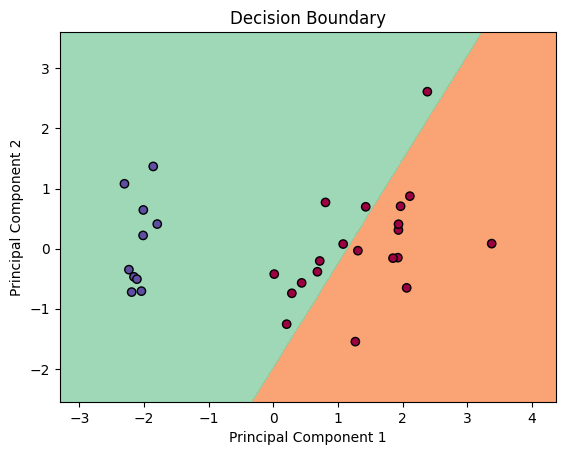

In [5]:
# Plot the decision boundary using PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

def plot_decision_boundary(X, y, model, pca):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(scaler.transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Decision Boundary')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_decision_boundary(X_test_pca, y_test, nn, pca)

## Using `Tensorflow`:

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Load the dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Iris-setosa vs. others

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Initialize the Neural Network model
model = Sequential([
    Input(shape=(4,)), 
    Dense(10, activation='relu', kernel_initializer='he_normal'),
    Dense(10, activation='relu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='he_normal')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7031 - loss: 0.7488 - val_accuracy: 1.0000 - val_loss: 0.1279
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9831 - loss: 0.1423 - val_accuracy: 1.0000 - val_loss: 0.0184
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0238 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 5.5314e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 1.5899e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 1.6042e-04 - val_accuracy: 1.0000 - val_loss: 5.8216e-05
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 6.2242e-05 - val_accuracy: 1.0000 - val_loss: 2.5945e-05
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 2.0937e-05 - val_accuracy

In [9]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 1.00


14784/14784 ━━━━━━━━━━━━━━━━━━━━ 11s 767us/step


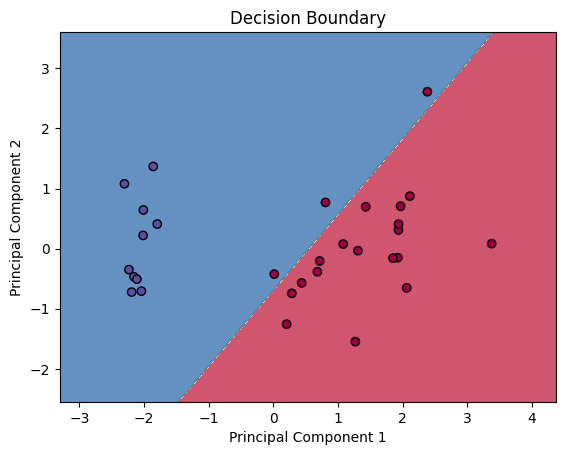

In [10]:
# Plot the decision boundary using PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

def plot_decision_boundary(X, y, model, pca):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(scaler.transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Decision Boundary')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_decision_boundary(X_test_pca, y_test, model, pca)

# Conclusion

In this notebook, we explored two approaches to implementing a Multi-Layer Perceptron (MLP) for binary classification on the Iris dataset:

1. **Custom Implementation from Scratch**: We manually built an MLP class from scratch, including essential components like weight initialization, forward and backward propagation, and parameter updates. This approach gave us a deeper understanding of how neural networks are trained and the mechanics behind backpropagation. We observed the training process and evaluated the model's performance, gaining insights into the challenges and limitations of implementing neural networks manually.

2. **Using TensorFlow/Keras**: We also leveraged the TensorFlow/Keras library to build and train an MLP. This high-level approach streamlined the development process, allowing us to focus on model design and evaluation rather than the underlying mathematical details. TensorFlow/Keras provides a robust framework for creating neural networks with built-in functions for optimization, loss computation, and performance evaluation. By comparing this approach to our custom implementation, we appreciated the convenience and efficiency offered by modern machine learning libraries.

Both methods demonstrated the capability of neural networks to handle binary classification tasks effectively. The TensorFlow/Keras implementation, in particular, showcased the ease of use and powerful features available for building complex models and performing efficient training.

Through this comparison, we gained valuable experience in both the theoretical and practical aspects of neural network training, preparing us for future work with more advanced models and real-world datasets.
